<a href="https://colab.research.google.com/github/Aman-prog2000/Aman-prog2000/blob/main/Titanic_Machine_Learning_Problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loading the Data

In [ ]:
# unzip the folder
!unzip "/content/titanic.zip"

Archive:  /content/titanic.zip
  inflating: gender_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [ ]:
# Importing the basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Load the .csv files 
train_data = pd.read_csv('/content/train.csv')
test_data = pd.read_csv('/content/test.csv')

In [ ]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


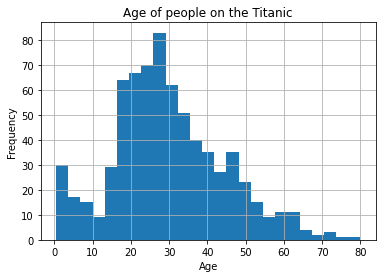

In [ ]:
train_data['Age'].hist(bins = 25)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age of people on the Titanic')
plt.show()

In [ ]:
train_data['Age'].isnull().sum() #---> 177 Null Values in the Age column

177

In [ ]:
train_data.shape[0]

891

In [ ]:
perc_Age_null_vals = train_data['Age'].isnull().sum()*100/train_data.shape[0] # Calculates the % null values in the age column
str(np.round(perc_Age_null_vals, 2)) +"%"

'19.87%'

In [ ]:
# Describe function
train_data['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [ ]:
train_data['Age'] = train_data['Age'].fillna(train_data['Age'].mean()) # fillna--> fills the Null values 

In [ ]:
train_data['Age'].isnull().sum()

0

In [ ]:
# Label Encoder
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder() # Model Object
train_data['Sex'] = le.fit_transform(train_data['Sex']) #---> Encodes the categorical columns 

#'''Sex --- M---F''''
#'''--------1---0'''''

In [ ]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
le.classes_ #--> 0 : female, 1 : male

array(['female', 'male'], dtype=object)

In [ ]:
train_data.corr() # Pearson Correlation

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.042939,0.033207,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.543351,-0.069809,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,0.131900,-0.331339,0.083081,0.018443,-0.549500
Sex,0.042939,-0.543351,0.131900,1.000000,0.084153,-0.114631,-0.245489,-0.182333
Age,0.033207,-0.069809,-0.331339,0.084153,1.000000,-0.232625,-0.179191,0.091566
SibSp,-0.057527,-0.035322,0.083081,-0.114631,-0.232625,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.245489,-0.179191,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,-0.182333,0.091566,0.159651,0.216225,1.000000


In [ ]:
# Check the null values again
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
perc_Cabin_Null_vals = train_data['Cabin'].isnull().sum()*100/train_data.shape[0] # Calculates the percentage null values in the cabin column
print(str(np.round(perc_Cabin_Null_vals,2)) + " %")

77.1 %


In [ ]:
train_data.drop('Cabin', axis = 1, inplace = True) # Dropped the entire column

In [ ]:
train_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [ ]:
perc_Embarked_Null_vals = train_data['Embarked'].isnull().sum()*100/train_data.shape[0]
perc_Embarked_Null_vals

0.2244668911335578

In [ ]:
train_data.dropna(inplace=True, axis=0) # Drop the null values : rows/column containing the null values

In [ ]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,S


In [ ]:
train_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [ ]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [ ]:
test_data['Age'] = test_data['Age'].fillna(test_data['Age'].mean()) # Fills the null values

In [ ]:
test_data.drop('Cabin', axis = 1, inplace = True) # Drop: drops the entire row/column

In [ ]:
test_data.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Embarked       0
dtype: int64

In [ ]:
test_data.corr()['Fare']

PassengerId    0.008211
Pclass        -0.577147
Age            0.329071
SibSp          0.171539
Parch          0.230046
Fare           1.000000
Name: Fare, dtype: float64

In [ ]:
test_data[['Pclass', 'Fare']] #Pclass as indepenent variable and Fare as my dependent variable

,Pclass,Fare
0,3,7.8292
1,3,7.0000
2,2,9.6875
3,3,8.6625
4,3,12.2875
...,...,...
413,3,8.0500
414,1,108.9000
415,3,7.2500
416,3,8.0500


In [ ]:
train_data['Pclass'].shape

(889,)

In [ ]:
from sklearn.linear_model import LinearRegression

# Model object
lr = LinearRegression(normalize=True)

X = train_data['Pclass'].values.reshape((-1,1)) 
y = train_data['Fare'].values.reshape((-1,1))

lr.fit(X, y) # fit the model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [ ]:
test_data[test_data['Fare'].isnull() == True]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked


In [ ]:
test_data[test_data['Fare'].isnull() == True]['Pclass']

152    3
Name: Pclass, dtype: int64

In [ ]:
test_data[test_data['Fare'].isnull() == True]['Pclass']

152    3
Name: Pclass, dtype: int64

In [ ]:
lr.predict([[3]])

array([[9.62747857]])

In [ ]:
test_data.fillna(9.63, inplace = True)

In [ ]:
test_data.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [ ]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,S


In [ ]:
train_data.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True) # Drop the columns from the train data

In [ ]:
test_data.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True) # Drop the same from the test data

In [ ]:
train_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.000000,1,0,7.2500,S
1,1,1,0,38.000000,1,0,71.2833,C
2,1,3,0,26.000000,0,0,7.9250,S
3,1,1,0,35.000000,1,0,53.1000,S
4,0,3,1,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,13.0000,S
887,1,1,0,19.000000,0,0,30.0000,S
888,0,3,0,29.699118,1,2,23.4500,S
889,1,1,1,26.000000,0,0,30.0000,C


In [ ]:
pd.get_dummies(train_data['Embarked'], drop_first=True)

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


In [ ]:
nominal_col = ['Embarked']
train_data = pd.concat((train_data,pd.get_dummies(train_data[nominal_col], drop_first = True)), axis = 1)

In [ ]:
train_data.drop('Embarked', axis = 1, inplace = True)

In [ ]:
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,0,3,1,22.0,1,0,7.2500,0,1
1,1,1,0,38.0,1,0,71.2833,0,0
2,1,3,0,26.0,0,0,7.9250,0,1
3,1,1,0,35.0,1,0,53.1000,0,1
4,0,3,1,35.0,0,0,8.0500,0,1


In [ ]:
X = train_data.drop('Survived',axis = 1) # features
y = train_data['Survived'] # target

In [ ]:
X_example = train_data.drop('Survived',axis = 1)

In [ ]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 889, dtype: int64

In [ ]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,3,1,22.0,1,0,7.2500,0,1
1,1,0,38.0,1,0,71.2833,0,0
2,3,0,26.0,0,0,7.9250,0,1
3,1,0,35.0,1,0,53.1000,0,1
4,3,1,35.0,0,0,8.0500,0,1


In [ ]:
X_example

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,3,1,22.000000,1,0,7.2500,0,1
1,1,0,38.000000,1,0,71.2833,0,0
2,3,0,26.000000,0,0,7.9250,0,1
3,1,0,35.000000,1,0,53.1000,0,1
4,3,1,35.000000,0,0,8.0500,0,1
...,...,...,...,...,...,...,...,...
886,2,1,27.000000,0,0,13.0000,0,1
887,1,0,19.000000,0,0,30.0000,0,1
888,3,0,29.699118,1,2,23.4500,0,1
889,1,1,26.000000,0,0,30.0000,0,0


In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

ss = StandardScaler() # Min Max scalar

for col in X.columns:
  X[col] = ss.fit_transform(X[col].values.reshape((-1,1)))

In [ ]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,0.825209,0.735342,-0.590495,0.431350,-0.474326,-0.500240,-0.307941,0.616794
1,-1.572211,-1.359911,0.643971,0.431350,-0.474326,0.788947,-0.307941,-1.621287
2,0.825209,-1.359911,-0.281878,-0.475199,-0.474326,-0.486650,-0.307941,0.616794
3,-1.572211,-1.359911,0.412509,0.431350,-0.474326,0.422861,-0.307941,0.616794
4,0.825209,0.735342,0.412509,-0.475199,-0.474326,-0.484133,-0.307941,0.616794
...,...,...,...,...,...,...,...,...
886,-0.373501,0.735342,-0.204724,-0.475199,-0.474326,-0.384475,-0.307941,0.616794
887,-1.572211,-1.359911,-0.821957,-0.475199,-0.474326,-0.042213,-0.307941,0.616794
888,0.825209,-1.359911,0.003524,0.431350,2.006119,-0.174084,-0.307941,0.616794
889,-1.572211,0.735342,-0.281878,-0.475199,-0.474326,-0.042213,-0.307941,-1.621287


In [ ]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 12)

In [ ]:
X_train.shape, X_test.shape

((711, 9), (178, 9))

In [ ]:
X_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
151,-1.572211,-1.359911,-0.590495,0.431350,-0.474326,0.694657,-0.482711,-0.307941,0.616794
219,-0.373501,0.735342,0.026738,-0.475199,-0.474326,-0.434807,-0.482711,-0.307941,0.616794
236,-0.373501,0.735342,1.106896,0.431350,-0.474326,-0.122745,-0.482711,-0.307941,0.616794
300,0.825209,-1.359911,0.003524,-0.475199,-0.474326,-0.490173,-0.482711,3.247377,-1.621287
515,-1.572211,0.735342,1.338358,-0.475199,-0.474326,0.038738,-0.482711,-0.307941,0.616794
...,...,...,...,...,...,...,...,...,...
242,-0.373501,0.735342,-0.050416,-0.475199,-0.474326,-0.434807,-0.482711,-0.307941,0.616794
254,0.825209,-1.359911,0.875433,-0.475199,2.006119,-0.239265,-0.482711,-0.307941,0.616794
391,0.825209,0.735342,-0.667649,-0.475199,-0.474326,-0.489251,-0.482711,-0.307941,0.616794
668,0.825209,0.735342,1.029742,-0.475199,-0.474326,-0.484133,-0.482711,-0.307941,0.616794


In [ ]:
y_train

151    1
219    0
236    0
300    1
515    0
      ..
242    0
254    0
391    1
668    0
845    0
Name: Survived, Length: 711, dtype: int64

X-X.mean()/standard_deviation(X)

In [ ]:
# Logistic Regression, Linear Regression, DecisionTreeRegressor, DecisionTreeClassifier, RandomForestRegressor, RandomForestClassifier, SVM

# Machine Learning Modelling

In [ ]:
# Baseline agorithm : KNN

X_train.shape, y_train.shape

((711, 9), (711,))

In [ ]:
from sklearn.base import clone

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV # This is for hyperparamter tuning
from sklearn.metrics import accuracy_score # to mesasure the accuracy of the model
from sklearn.neighbors import KNeighborsClassifier # To use the knn algorithm

# KNN--> K- Nearest negihbors
knn = KNeighborsClassifier() 

# Set parameters
n_neighbors = list(np.arange(3, 200, 2)) #---> last element
weights = ['uniform', 'distance']
algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']
p = [1,2] #--> Distance: Euclidean and Manhattan

# dictonary for parameters
params = {'n_neighbors' : n_neighbors,
          'weights' : weights,
          'algorithm' : algorithm,
          'p' : p
          }

# RSCV                  model parameters score
GSCV_Knn = GridSearchCV(knn, params, scoring='accuracy', n_jobs=-1, cv = 5, verbose=1) # n_iter = 20

# FIt the model
GSCV_Knn.fit(X_train, y_train)

Fitting 5 folds for each of 1584 candidates, totalling 7920 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 360 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 2760 tasks      | elapsed:   24.0s
[Parallel(n_jobs=-1)]: Done 6760 tasks      | elapsed:   57.1s
[Parallel(n_jobs=-1)]: Done 7920 out of 7920 | elapsed:  1.1min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=-1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22,
                                         24, 26, 28, 30, 32, 34, 36, 38, 40, 42,
                                         44, 46, 48, 50, 52, 54, 56, 58, 60, ...],
                         'p': [1, 2], 'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=1)

In [ ]:
GSCV_Knn.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=18, p=1,
                     weights='uniform')

In [ ]:
KNN_best_model = clone(GSCV_Knn.best_estimator_)

In [ ]:
KNN_best_model # best KNN modell

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=8, p=1,
                     weights='distance')

In [ ]:
GSCV_Knn.score(X_test, y_test)*100

82.02247191011236

In [ ]:
predictions = GSCV_Knn.predict(testdata)

In [ ]:
 list(np.arange(2, 200, 2))

[2,
 4,
 6,
 8,
 10,
 12,
 14,
 16,
 18,
 20,
 22,
 24,
 26,
 28,
 30,
 32,
 34,
 36,
 38,
 40,
 42,
 44,
 46,
 48,
 50,
 52,
 54,
 56,
 58,
 60,
 62,
 64,
 66,
 68,
 70,
 72,
 74,
 76,
 78,
 80,
 82,
 84,
 86,
 88,
 90,
 92,
 94,
 96,
 98,
 100,
 102,
 104,
 106,
 108,
 110,
 112,
 114,
 116,
 118,
 120,
 122,
 124,
 126,
 128,
 130,
 132,
 134,
 136,
 138,
 140,
 142,
 144,
 146,
 148,
 150,
 152,
 154,
 156,
 158,
 160,
 162,
 164,
 166,
 168,
 170,
 172,
 174,
 176,
 178,
 180,
 182,
 184,
 186,
 188,
 190,
 192,
 194,
 196,
 198]

In [ ]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV


# Model object
lr = LogisticRegression()

# set params
penalty = ['l1', 'l2', 'elastic']
C = [0.01, 0.05, 0.1, 0.5, 1.0, 1.5, 2.0, 3.0, 4.0, 5.0]
max_iter = list(np.arange(100, 200, 10))

# parmaeter dictionary
set_params = {"penalty" : penalty,
              "C" : C,
              "max_iter" : max_iter
              }

# RSCV
GSCV_lr = GridSearchCV(lr, set_params, scoring = 'accuracy', n_jobs= -1, cv = 5)

# Fit the model
GSCV_lr.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.01, 0.05, 0.1, 0.5, 1.0, 1.5, 2.0, 3.0, 4.0,
                               5.0],
                         'max_iter': [100, 110, 120, 130, 140, 150, 160, 170,
                                      180, 190],
                         'penalty': ['l1', 'l2', 'elastic']},
             pre_dispatch='2*n_jobs', refit=True, 

In [ ]:
GSCV_lr.best_estimator_

LogisticRegression(C=0.05, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
lr_best_model = clone(GSCV_lr.best_estimator_)

In [ ]:
GSCV_lr.score(X_test, y_test)*100

82.02247191011236

In [ ]:
# Decision Trees
from sklearn.tree import DecisionTreeClassifier

# model object 
dt_clf = DecisionTreeClassifier()

# set hyperparameters
criterion = ["gini", "entropy"]
splitter = ["best", "random"]
max_depth = list(np.arange(5, 500, 5))
min_samples_split = list(np.arange(1, 10))
min_samples_leaf = list(np.arange(1, 20))
max_features = ['auto', 'sqrt', 'log2']
max_features.append(None)

# Set Parameters
params = { "criterion" : criterion,
           "splitter" : splitter,
           "max_depth" : max_depth,
           "min_samples_split" :min_samples_split,
           "min_samples_leaf" : min_samples_leaf,
           "max_features" : max_features
}

# RSCV
RSCV_dt = RandomizedSearchCV(dt_clf, params, 20, scoring='accuracy', n_jobs = 1, cv = 5, random_state=42)
# fit the mode
RSCV_dt.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort='deprecated',
                                                    random_state=None,
          

In [ ]:
dt_best_model = clone(RSCV_dt.best_estimator_)

In [ ]:
RSCV_dt.score(X_test, y_test)

0.7415730337078652

In [ ]:
# Random Forest
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier()

# RSCV
rscv_rf = RandomizedSearchCV(rf_clf, random_grid, n_iter = 50, scoring = 'accuracy', n_jobs = -1, cv=5, verbose = 1, random_state=42)

# fit the model
rscv_rf.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  5.7min


KeyboardInterrupt: ignored

In [ ]:
rf_clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
rf_clf.score(X_test, y_test)

0.7640449438202247

In [ ]:
from sklearn.svm import SVC

svm_clf = SVC(probability=True)
svm_clf.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
svm_clf.score(X_test, y_test)

0.8370786516853933

In [ ]:
from sklearn.ensemble import VotingClassifier


estimators = [('knn', KNN_best_model), ('lr', lr_best_model), ('dt', dt_best_model), ('rf', rf_clf), ('svm', svm_clf)]
vc = VotingClassifier(estimators=estimators, voting='soft', n_jobs=-1)
vc.fit(X_train, y_train)

VotingClassifier(estimators=[('knn',
                              KNeighborsClassifier(algorithm='auto',
                                                   leaf_size=30,
                                                   metric='minkowski',
                                                   metric_params=None,
                                                   n_jobs=None, n_neighbors=8,
                                                   p=1, weights='distance')),
                             ('lr',
                              LogisticRegression(C=0.01, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                            

In [ ]:
vc.score(X_test, y_test)

0.8033707865168539

In [ ]:
predictions = vc.predict(X_test)

accuracy_score(y_test, predictions)

0.7921348314606742

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

adb = AdaBoostClassifier()

adb.fit(X_train, y_train)
adb.score(X_test, y_test)

0.8146067415730337

# Feature Selection

In [ ]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0.825209,0.735342,-0.590495,0.431350,-0.474326,-0.500240,-0.482711,-0.307941,0.616794
1,-1.572211,-1.359911,0.643971,0.431350,-0.474326,0.788947,2.071634,-0.307941,-1.621287
2,0.825209,-1.359911,-0.281878,-0.475199,-0.474326,-0.486650,-0.482711,-0.307941,0.616794
3,-1.572211,-1.359911,0.412509,0.431350,-0.474326,0.422861,-0.482711,-0.307941,0.616794
4,0.825209,0.735342,0.412509,-0.475199,-0.474326,-0.484133,-0.482711,-0.307941,0.616794
...,...,...,...,...,...,...,...,...,...
886,-0.373501,0.735342,-0.204724,-0.475199,-0.474326,-0.384475,-0.482711,-0.307941,0.616794
887,-1.572211,-1.359911,-0.821957,-0.475199,-0.474326,-0.042213,-0.482711,-0.307941,0.616794
888,0.825209,-1.359911,0.003524,0.431350,2.006119,-0.174084,-0.482711,-0.307941,0.616794
889,-1.572211,0.735342,-0.281878,-0.475199,-0.474326,-0.042213,2.071634,-0.307941,-1.621287


In [ ]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso

In [ ]:
sfm = SelectFromModel(Lasso())
sfm.fit(X, y)

SelectFromModel(estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                                max_iter=1000, normalize=False, positive=False,
                                precompute=False, random_state=None,
                                selection='cyclic', tol=0.0001,
                                warm_start=False),
                max_features=None, norm_order=1, prefit=False, threshold=None)

In [ ]:
sfm.get_support()

array([False, False, False, False, False, False, False, False, False])

In [ ]:
dt_best_model.fit(X, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=155, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
dt_best_model.feature_importances_

array([0.15270033, 0.45359612, 0.14377668, 0.04084934, 0.04025997,
       0.13841707, 0.00441251, 0.02334207, 0.00264592])

In [ ]:
rf_clf.feature_importances_

array([0.08414883, 0.26087118, 0.25221305, 0.05485794, 0.04172269,
       0.2651766 , 0.01465527, 0.00922943, 0.017125  ])

In [ ]:
columns_to_drop = []
for val,col in zip(rf_clf.feature_importances_, X.columns):

  if val < 0.01:
    columns_to_drop.append(col)



In [ ]:
columns_to_drop

['Embarked_Q']

In [ ]:
X.drop(columns_to_drop, axis = 1, inplace = True)

In [ ]:
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X, y)

In [ ]:
svm_clf.fit(X_train_1, y_train_1)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
svm_clf.score(X_test_1, y_test_1)

0.8251121076233184